In [13]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import scipy
import pandas as pd
import seaborn as sns
path =  (os.path.abspath(os.path.join(r'.', os.pardir)))
import sys
sys.path.append(path)
from nuclei_segmentation import otsu as ot
from nuclei_segmentation import dicescore as dsc
from nuclei_segmentation import two_level_otsu as tlot
from PIL import Image
import os
import os.path

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\Helen Jade\anaconda3\envs\dataanalysis0104_env\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## load all datasets
- binarize 
- copy

In [2]:
# Set ground truth images from N2DH-GOWT1 dataset and N2DL-HeLa dataset to 0 and 1

def binarize(x):
    img = x.copy()

    for o in np.ndindex(img.shape):
        if img[o] > 0: 
           img[o] = 1
        else:
            img[o] = 0
    
    return img

In [9]:
# Preprocessing - Histogram stretching

def stretch(x):
    intensities = []
   
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(x, (2,  98))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
   
    img_max = max(intensities)
    img_min = min(intensities)
    img_stretch = (img-img_min)*(256 / (img_max-img_min))
    return img_stretch

In [1]:
# Load raw images from N2DH-GOWT1-dataset

img_N2DH_GOWT1 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/img")
for f in os.listdir(path):
    img_N2DH_GOWT1.append(imread(os.path.join(path , f)))


# Load ground truth images from N2DH-GOWT1-dataset

gt_N2DH_GOWT1 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/gt")
for f in os.listdir(path):
    gt_N2DH_GOWT1.append(imread(os.path.join(path , f)))

NameError: name 'imread' is not defined

In [ ]:
# Load raw images from N2DL-HeLa-dataset

img_N2DL_HeLa = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/img")
for f in os.listdir(path):
    img_N2DL_HeLa.append(imread(os.path.join(path , f)))


# Load ground truth images from N2Dl-HeLa-dataset

gt_N2DL_HeLa = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DL-HeLa/gt")
for f in os.listdir(path):
    gt_N2DL_HeLa.append(imread(os.path.join(path , f)))

In [5]:
# Load raw images of NIH3T3-dataset

img_NIH3T3 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img")
for f in os.listdir(path):
    img_NIH3T3.append(imread(os.path.join(path , f)))

# Load ground truth images of NIH3T3-dataset
 
gt_NIH3T3 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt")
for f in os.listdir(path):
    gt_NIH3T3.append(imread(os.path.join(path , f)))

In [ ]:
# Reassign the ground truth images from N2DH-GOWT1 dataset and N2DLHeLa dataset

binary_gt_N2DH_GOWT1 = []
for i in range(0,len(gt_N2DH_GOWT1)):
    binary_gt_N2DH_GOWT1.append(binarize(gt_N2DH_GOWT1[i])) 


binary_gt_N2DL_HeLa = []
for i in range(0,len(gt_N2DL_HeLa)):
    binary_gt_N2DL_HeLa.append(binarize(gt_N2DL_HeLa[i])) 

In [6]:
# Make a copy of all images of each dataset / use as "no preprocessed images"

#copy_img_N2DH_GOWT1 = img_N2DH_GOWT1.copy()

#copy_img_N2DL_HeLa = img_N2DL_HeLa.copy()

copy_img_NIH3T3 = img_NIH3T3.copy()


### NIH3T3

Perfect preprocessing option:
- median filter and histogram stretching 
- filtersize:
 

In [10]:
#apply median filter
median_img_NIH3T3 = []
for i in range(0,len(copy_img_NIH3T3)):
    median_img_NIH3T3.append(scipy.ndimage.median_filter(copy_img_NIH3T3[i] , 5))

#apply histogram stretching
stretch_img_NIH3T3 = []
for i in range(0,len(copy_img_NIH3T3)):
    stretch_img_NIH3T3.append(stretch(copy_img_NIH3T3[i]))

#apply median filter and histogram stretching
median_stretch_img_NIH3T3 = []
for i in range(0,len(median_img_NIH3T3)):
    median_stretch_img_NIH3T3.append(stretch(median_img_NIH3T3[i]))

Find optimal Otsu method
- otsu nonvectorized
- otsu vectorized
- two level otsu clip vectorized
- two level otsu vectorized

##### apply otsu methods to median filtern and histogram stretching NIH3T3

### normal otsu

In [11]:
otsu_median_stretch_img_NIH3T3 = []
for i in range(0,len(median_stretch_img_NIH3T3)):
    otsu_median_stretch_img_NIH3T3.append(ot.otsu_thresholding(median_stretch_img_NIH3T3[i] , 256))

In [12]:
dice_otsu_median_stretch_img_NIH3T3 = []
for j in range(0,len(otsu_median_stretch_img_NIH3T3)):
    dice_otsu_median_stretch_img_NIH3T3.append(dsc.dice(otsu_median_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_median_stretch_img_NIH3T3)

[0.9126064899014071, 0.8849869001333296, 0.8300675280378401, 0.7593498927123763, 0.7715177523362349, 0.7258770509442753, 0.6876649043248704, 0.7542425610642468, 0.1710989927813985, 0.6201253474708661, 0.6457822491803156, 0.6824470203713232, 0.5608004693361966, 0.5962434107588243, 0.6148696080827027, 0.5940741781631523, 0.7154374219483178, 0.7934323834146368]


### two level otsu vectorized

In [14]:
otsu_tlot_median_stretch_img_NIH3T3 = []
for i in range(0,len(median_stretch_img_NIH3T3)):
    otsu_tlot_median_stretch_img_NIH3T3.append(tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3[i] , 256))


In [15]:
dice_otsu_tlot_median_stretch_img_NIH3T3 = []
for j in range(0,len(otsu_tlot_median_stretch_img_NIH3T3)):
    dice_otsu_tlot_median_stretch_img_NIH3T3.append(dsc.dice(otsu_tlot_median_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_tlot_median_stretch_img_NIH3T3)

[0.9542517930375836, 0.9436915173888986, 0.597743423825288, 0.7535842572947709, 0.7863621972196926, 0.5691051388685712, 0.5268406266169837, 0.5742365445576996, 0.5652128909150641, 0.40459945894230437, 0.5154122480586806, 0.39278789083486404, 0.35270584210264927, 0.5889633064063944, 0.5109162624916856, 0.5315650349888865, 0.6978455124809924, 0.4506835064207276]


### two level otsu clip vectorized

## Boxplot optimal otsu NIH3T3


C:\Users\Helen Jade\AppData\Local\Temp\ipykernel_28080\1200791880.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['normal otsu' , 'two level otsu' ])


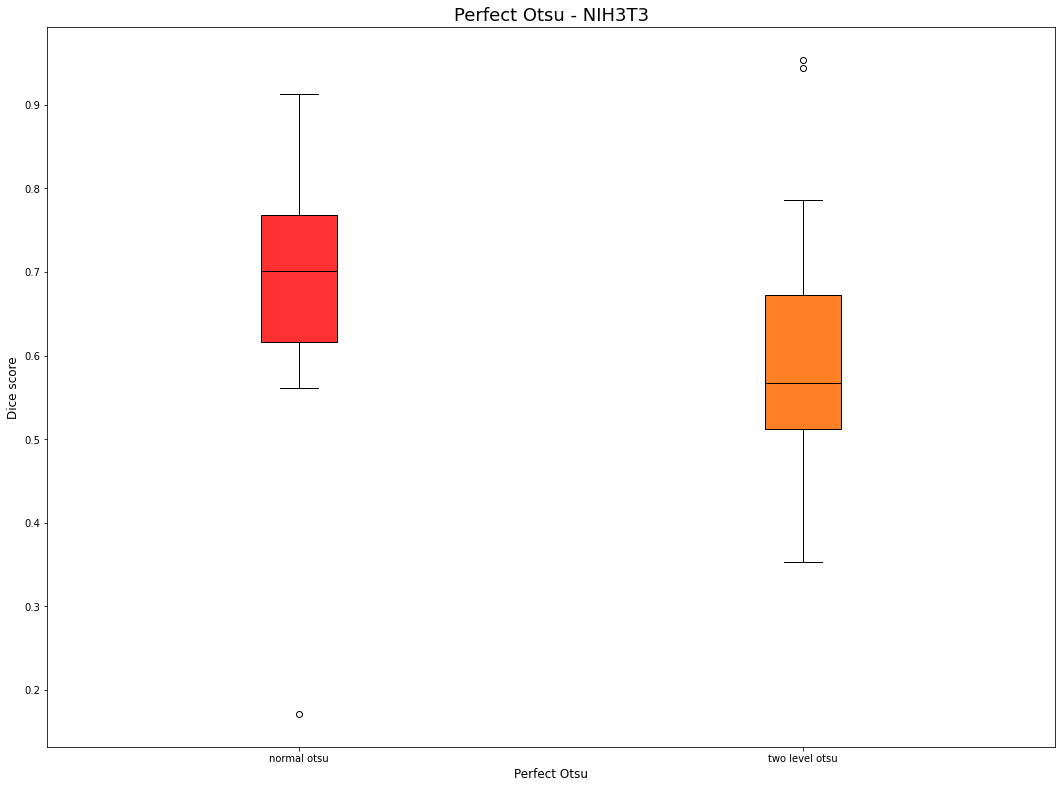

In [16]:
data_NIH3T3 = [dice_otsu_median_stretch_img_NIH3T3, dice_otsu_tlot_median_stretch_img_NIH3T3, ]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['normal otsu' , 'two level otsu' ])
plt.title('Perfect Otsu - NIH3T3' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Perfect Otsu' , size = 12)
bp = ax.boxplot(data_NIH3T3, patch_artist = True)

colors = ['#FF3030', '#FF7F24']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

### N2DH-GOWT1

Perfect preprocessing option:

- gaussian filter and histogram stretching
- filtersize: 